In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [35]:
train_label_dir = './coco/labels/train2017'
all_classes = []
for file in os.listdir(train_label_dir):
    path = os.path.join(train_label_dir, file)
    with open(path) as f:
        classlist = []

        for line in f:
            vals = line.split(' ')
            numboxes = (len(vals)-1) // 4
            for _ in range(numboxes):
                classlist.append(int(vals[0]))
        all_classes.extend(classlist)

In [36]:
all_classes = sorted(all_classes)

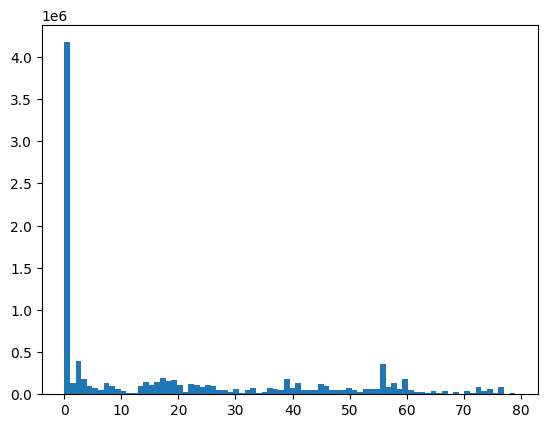

In [37]:
plt.hist(all_classes, bins=80)
plt.show()

In [40]:
import json
annotations = './coco/annotations/instances_val2017.json'

with open(annotations) as f:
    data = json.load(f)

In [44]:
data = dict(data)

In [67]:
sizes = []

for an in data['annotations']:
    sizes.append(an['bbox'][2]*an['bbox'][2])


In [68]:
print(max(sizes))
print(np.sqrt(max(sizes)))

409600.0
640.0


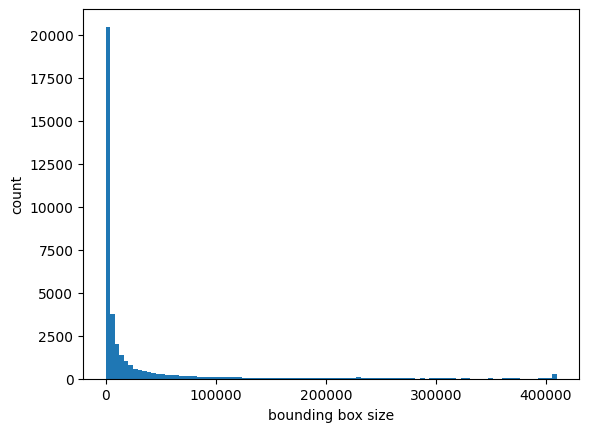

In [77]:
bins = np.linspace(0, max(sizes), 100)
plt.hist(sizes, bins=bins)
# plt.xscale('log')
plt.xlabel('bounding box size')
plt.ylabel('count')
plt.show()

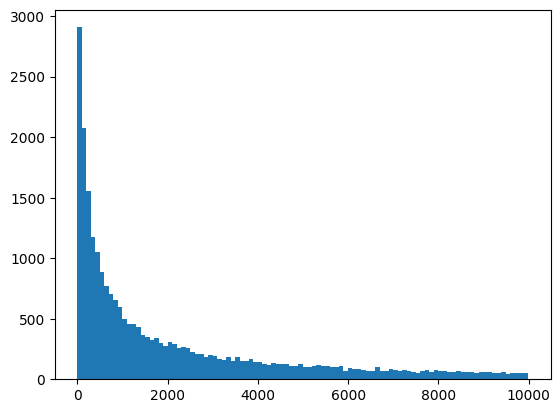

In [75]:
sizes_np = np.array(sizes)
smaller = sizes_np[sizes_np < 10000] 
plt.hist(smaller, bins=100)
plt.show()